<a href="https://colab.research.google.com/github/Avijitma123/Cnacer-Predictor-GUI-using-ML/blob/master/Skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skin cancer detection using CNN



In [1]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
test_path='/content/drive/MyDrive/MY data/Dataset/data/test'
train_path='/content/drive/MyDrive/MY data/Dataset/data/train'


In [17]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['acc'])


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_path,target_size=(32,32),batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(test_path, target_size=(32,32), batch_size=32, class_mode='binary')

hist=model.fit_generator(train_generator,epochs=5,steps_per_epoch=20,validation_data=validation_generator, validation_steps=50, workers=4)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
20/20 [==============================] - 6s 316ms/step - loss: 0.3990 - acc: 0.8109 - val_loss: 0.4008 - val_acc: 0.7887
Epoch 2/5
20/20 [==============================] - 7s 316ms/step - loss: 0.4063 - acc: 0.8047 - val_loss: 0.3735 - val_acc: 0.8242
Epoch 3/5
20/20 [==============================] - 7s 316ms/step - loss: 0.3768 - acc: 0.8164 - val_loss: 0.3628 - val_acc: 0.8293
Epoch 4/5
20/20 [==============================] - 6s 312ms/step - loss: 0.3960 - acc: 0.8016 - val_loss: 0.3666 - val_acc: 0.8185
Epoch 5/5
20/20 [==============================] - 6s 307ms/step - loss: 0.3708 - acc: 0.8281 - val_loss: 0.3665 - val_acc: 0.8217


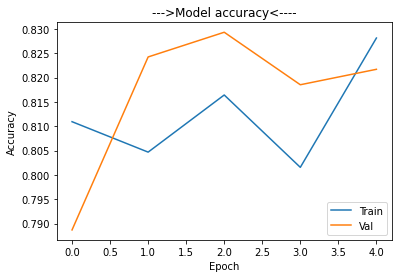

In [28]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('--->Model accuracy<----')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()